In [20]:
import sys
IN_COLAB = "google.colab" in sys.modules

def allow_notebook_for_test():
    print("Testing the connectome notebook")

show_plot = True
test_mode = False
save_path = "/content/"

#if IN_COLAB:
#    !pip install --quiet python-igraph
    


In [21]:
%matplotlib inline


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()

### Load data

In [23]:
!wget -nc 'https://www.dropbox.com/s/6vrmhfnqznqsflf/adjacency_matrix.csv'

File ‘adjacency_matrix.csv’ already there; not retrieving.



In [24]:
mpath = ''
connectome = pd.read_csv(mpath + 'adjacency_matrix.csv')
#connectome = pd.read_csv(mpath + 'adjacency_matrix_mn.csv')
connectome.set_index('Neurons', inplace=True)

In [25]:
connectome.shape

(1640, 1640)

In [26]:
connectome.head()

PRCal3  PRCal4  PRCal5  ...  INdescRFa_r  VNC_sg2l 2028657  MNpostv_sg2l
Neurons                          ...                                             
PRCal3        0       0       0  ...            0                 0             0
PRCal4        0       0       0  ...            0                 0             0
PRCal5        2       1       0  ...            0                 0             0
PRCal7        0       0       0  ...            0                 0             0
PRCal6        0       0       0  ...            0                 0             0

[5 rows x 1640 columns]

In [27]:
connectome.describe()

PRCal3       PRCal4  ...  VNC_sg2l 2028657  MNpostv_sg2l
count  1640.000000  1640.000000  ...       1640.000000   1640.000000
mean      0.002439     0.000610  ...          0.008537      0.001220
std       0.060455     0.024693  ...          0.191141      0.034911
min       0.000000     0.000000  ...          0.000000      0.000000
25%       0.000000     0.000000  ...          0.000000      0.000000
50%       0.000000     0.000000  ...          0.000000      0.000000
75%       0.000000     0.000000  ...          0.000000      0.000000
max       2.000000     1.000000  ...          6.000000      1.000000

[8 rows x 1640 columns]

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(connectome)
centroids = kmeans.cluster_centers_


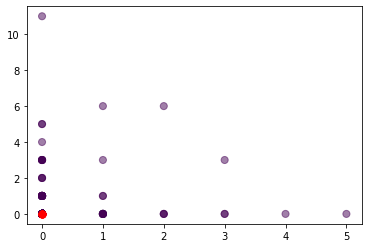

In [29]:
plt.scatter(connectome['Ser-tr1l'], connectome['Ser-tr1r'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

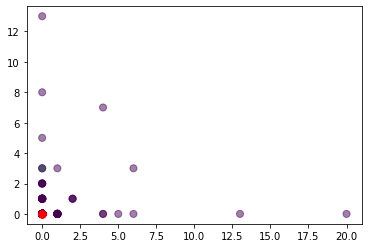

In [30]:
plt.scatter(connectome['Loop-l'], connectome['Loop-r'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [31]:
import networkx as nx

In [32]:
Gnd = nx.from_pandas_adjacency(connectome)
G = nx.from_pandas_adjacency(connectome, create_using=nx.DiGraph)

In [33]:
Gnd.name = 'Connectome adjacency matrix - non-directed'
print(nx.info(Gnd))

Name: Connectome adjacency matrix - non-directed
Type: Graph
Number of nodes: 1640
Number of edges: 6527
Average degree:   7.9598


In [34]:
G.name = 'Connectome adjacency matrix directed graph'
print(nx.info(G))

Name: Connectome adjacency matrix directed graph
Type: DiGraph
Number of nodes: 1640
Number of edges: 7026
Average in degree:   4.2841
Average out degree:   4.2841


In [35]:
#Isolates are nodes with no neighbors (degree zero)
list(nx.isolates(G))

['MUSche_neuVob_sg2l2']

In [36]:
nx.density(G), nx.density(Gnd)

(0.002613878182711052, 0.004856471078438667)

In [37]:
from networkx.algorithms import bipartite
print(bipartite.is_bipartite(G))

False


In [38]:
len(G.edges.values()), len(G.edges.items())

(7026, 7026)

In [39]:
sorted([list(c.values())[0] for u, v, c in G.edges.data()], reverse=True) #List the strongest edges

#Print the strongest edges in the network
prev = 0
for (u, v, c) in G.edges.data():
    
    if list(c.values())[0] >= 27:
        #prev = list(c.values())[0]
        print(u, v, c) 


MS1; SN MNl1 {'weight': 29}
MS1; SN MNr1 {'weight': 41}
Ser-h1l MC {'weight': 36}
cioMNcover_r covercell12clock_post {'weight': 50}
cioMNcover_r covercell9clock_post {'weight': 56}
cioMNcover_r covercell7clock_post {'weight': 27}
cioMNcover_r covercell7clock_ant {'weight': 31}
MNl3; [pair of MNr3] prototroch_8clock_P {'weight': 30}
cioMNcover_l2 covercell1clock {'weight': 45}
cioMNcover_l2 covercell2clock_post {'weight': 41}
MNspinning_sg2r spinGland_sg2l {'weight': 29}
MNspinning_sg2l spinGland_sg3r {'weight': 45}
MNspinning_sg2l spinGland_sg2r {'weight': 32}
INcosplit_sg2r1 MNspinning_sg2r {'weight': 27}
MS2; SN MS4; SN {'weight': 37}


In [40]:
#Print the strongest edges in the network (same as previous cell, only sorted)
graph_edges={}
for (u, v, c) in G.edges.data():
  graph_edges[u,v] = list(c.values())[0]
  
list(sorted(graph_edges.items(), key=(lambda item: (-item[1],item[0]))))[:20]

[(('cioMNcover_r', 'covercell9clock_post'), 56),
 (('cioMNcover_r', 'covercell12clock_post'), 50),
 (('MNspinning_sg2l', 'spinGland_sg3r'), 45),
 (('cioMNcover_l2', 'covercell1clock'), 45),
 (('MS1; SN', 'MNr1'), 41),
 (('cioMNcover_l2', 'covercell2clock_post'), 41),
 (('MS2; SN', 'MS4; SN'), 37),
 (('Ser-h1l', 'MC'), 36),
 (('MNspinning_sg2l', 'spinGland_sg2r'), 32),
 (('cioMNcover_r', 'covercell7clock_ant'), 31),
 (('MNl3; [pair of MNr3]', 'prototroch_8clock_P'), 30),
 (('MNspinning_sg2r', 'spinGland_sg2l'), 29),
 (('MS1; SN', 'MNl1'), 29),
 (('INcosplit_sg2r1', 'MNspinning_sg2r'), 27),
 (('cioMNcover_r', 'covercell7clock_post'), 27),
 (('MC', 'prototroch_12clock_P'), 26),
 (('MNcrab_sg3l1', 'MUSche_notAac_sg3r4'), 26),
 (('MNl1', 'MUSlong_V_sg1r10'), 26),
 (('MS2; SN', 'MNr2'), 26),
 (('Ser-tr1r', 'paratroch_II_vl_2'), 26)]

In [41]:
#Find and print the most connected nodes
sorted([d for n, d in G.degree()], reverse=True)

for n, d in G.degree():
    if d >= 50:
        print(n, d)

cMNPDF-vcl1 62
Ser-h1l 71
INrope_r1 63
Ser-h1r 57
MNl3; [pair of MNr3] 50
pygPBunp 122
INrope_l1 81
MNspiderATO_sg2r1 50
Ser-tr1r 97
Loop-r 86
MNant_r 64
Ser-tr1l 65
Loop-l 90
cMNATO 66
MNspinning_sg2r 70
MNspinning_sg2l 63
MNant_l 75
cMNdc; PDF 61
MNcrab_sg2l1 58
INarc1l 55


In [42]:
#Find and print the most connected nodes (same as previous cell, only sorted)
list(sorted(dict(G.degree()).items(), key=(lambda item: (-item[1],item[0]))))[:20]

[('pygPBunp', 122),
 ('Ser-tr1r', 97),
 ('Loop-l', 90),
 ('Loop-r', 86),
 ('INrope_l1', 81),
 ('MNant_l', 75),
 ('Ser-h1l', 71),
 ('MNspinning_sg2r', 70),
 ('cMNATO', 66),
 ('Ser-tr1l', 65),
 ('MNant_r', 64),
 ('INrope_r1', 63),
 ('MNspinning_sg2l', 63),
 ('cMNPDF-vcl1', 62),
 ('cMNdc; PDF', 61),
 ('MNcrab_sg2l1', 58),
 ('Ser-h1r', 57),
 ('INarc1l', 55),
 ('MNl3; [pair of MNr3]', 50),
 ('MNspiderATO_sg2r1', 50)]

In [43]:
#Most connected cells PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. 
#sorted(nx.pagerank(G).values(), reverse=True)

#we get fairly the same result that we got when we applied degree centrality:

list(sorted(nx.pagerank(G).items(), key=(lambda item: (-item[1],item[0]))))[:20]

[('MNspinning_sg2r', 0.005872642818393821),
 ('MNladder_sg1r', 0.0049909723503436705),
 ('INpro_l3', 0.0049770533611574125),
 ('Ser-h1l', 0.004929588472189425),
 ('Ser-tr1r', 0.004679298848417767),
 ('Ser-h1r', 0.004444130579529891),
 ('IN1pr', 0.0041756282602507175),
 ('INRGWa-dcr1', 0.004113257602534962),
 ('MC3cover_r', 0.004024558140046878),
 ('IN1al', 0.003921174230051985),
 ('IN_NOSdr', 0.003789851513245476),
 ('INintl1', 0.003672945307293549),
 ('SN_WLD1r', 0.003669655479222711),
 ('MNladder_sg1l', 0.0034470179648982465),
 ('INarc1l', 0.003353579560323721),
 ('MNl2', 0.00326416625999965),
 ('INpro_r2; INvc_r7', 0.00321385394144398),
 ('MNspinning_sg2l', 0.003133060415087669),
 ('MC', 0.0030856137165722816),
 ('Loop-l', 0.0030750210765484298)]

In [44]:
#Clustering coefficient is the fraction of the node’s neighbors that are also neighbors with each other
#For social networks, this metric is very important as it allows finding the proportion 
#of a person’s friends that are also friends with each other.
#nx.clustering(G)
nx.average_clustering(G)
#list(sorted(nx.clustering(G).items(), key=(lambda item: (-item[1],item[0]))))[:20]

0.12926375241778615

### Ego networks consist of a focal node ("ego") and the nodes to whom ego is directly connected to (these are called "alters") plus the ties, if any, among the alters.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


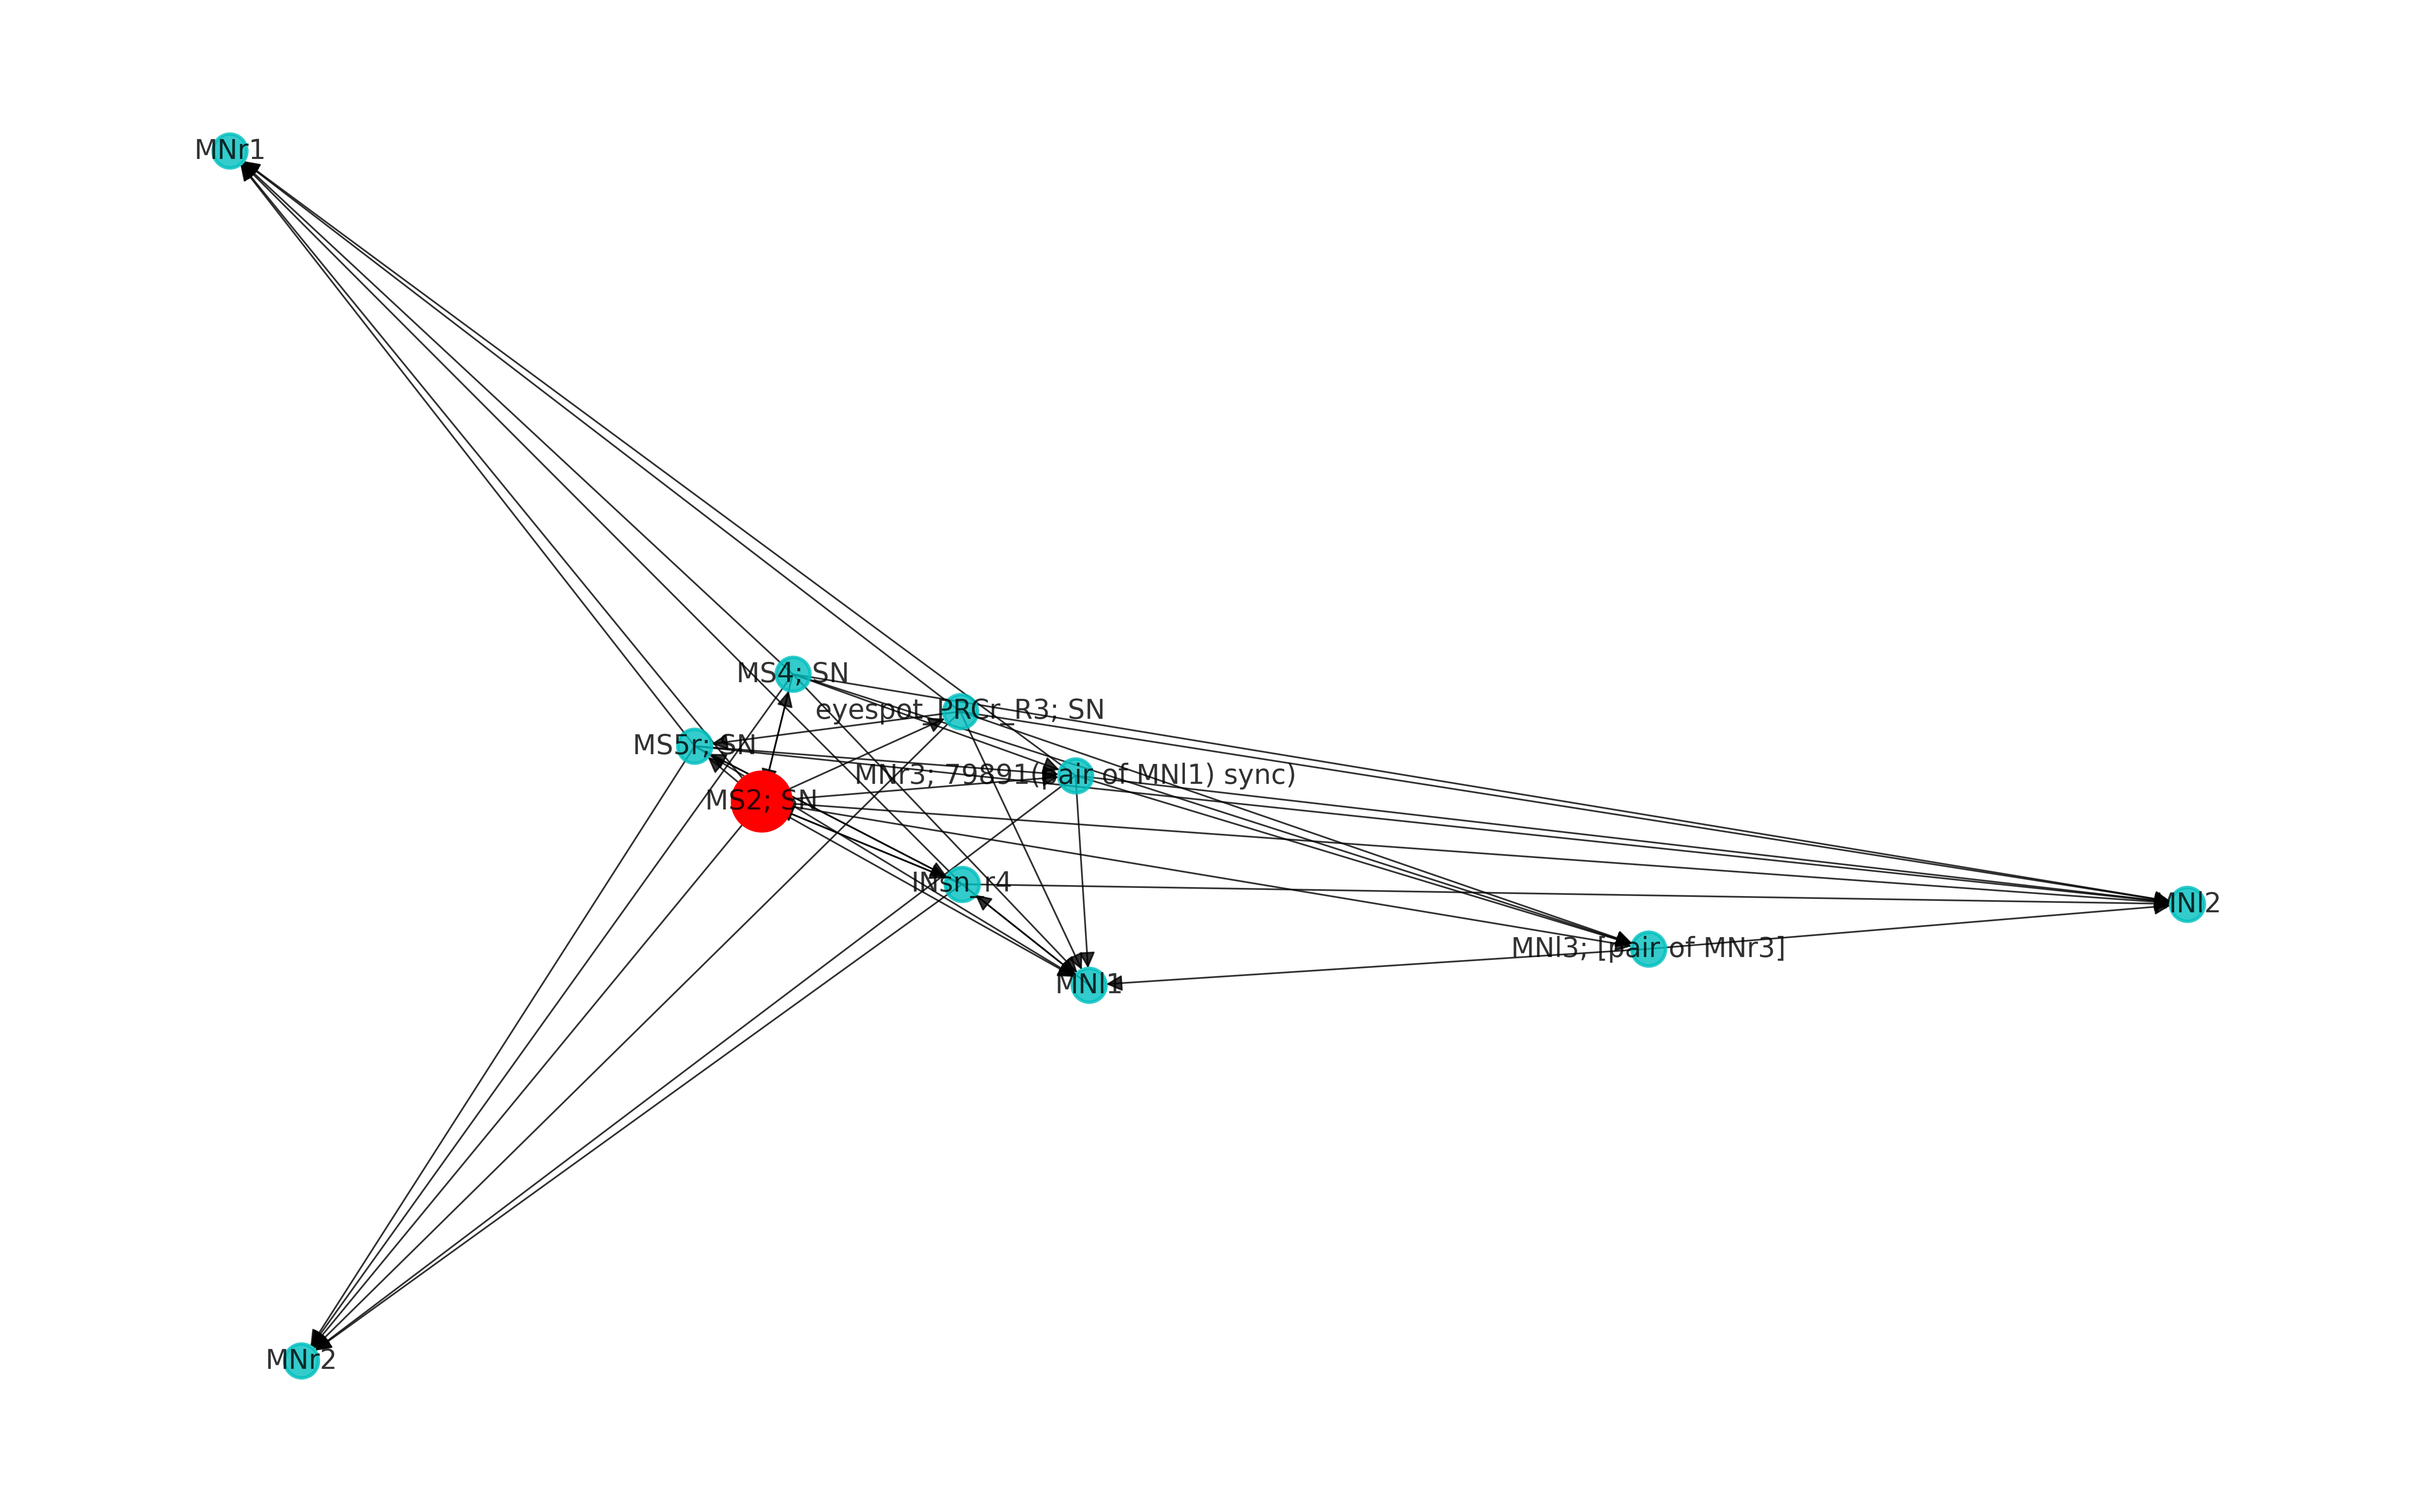

In [45]:
#Ego network of a node from the connectome graph


deg = 'MS2; SN'
node_ego= nx.ego_graph(G,deg)
pos= nx.spring_layout(node_ego)

h = 6
w = h*1.618
d = 600 #change to 600 for final version

plt.figure(figsize=(w, h), dpi=d)
nx.draw(node_ego, pos, node_color='c', node_size=100, with_labels=True, alpha=0.8, width=0.5, font_size=8, font_family='Verdana')
nx.draw_networkx_nodes(node_ego, pos, nodelist=[deg], node_size=300, node_color='r', alpha=1)
plt.show()

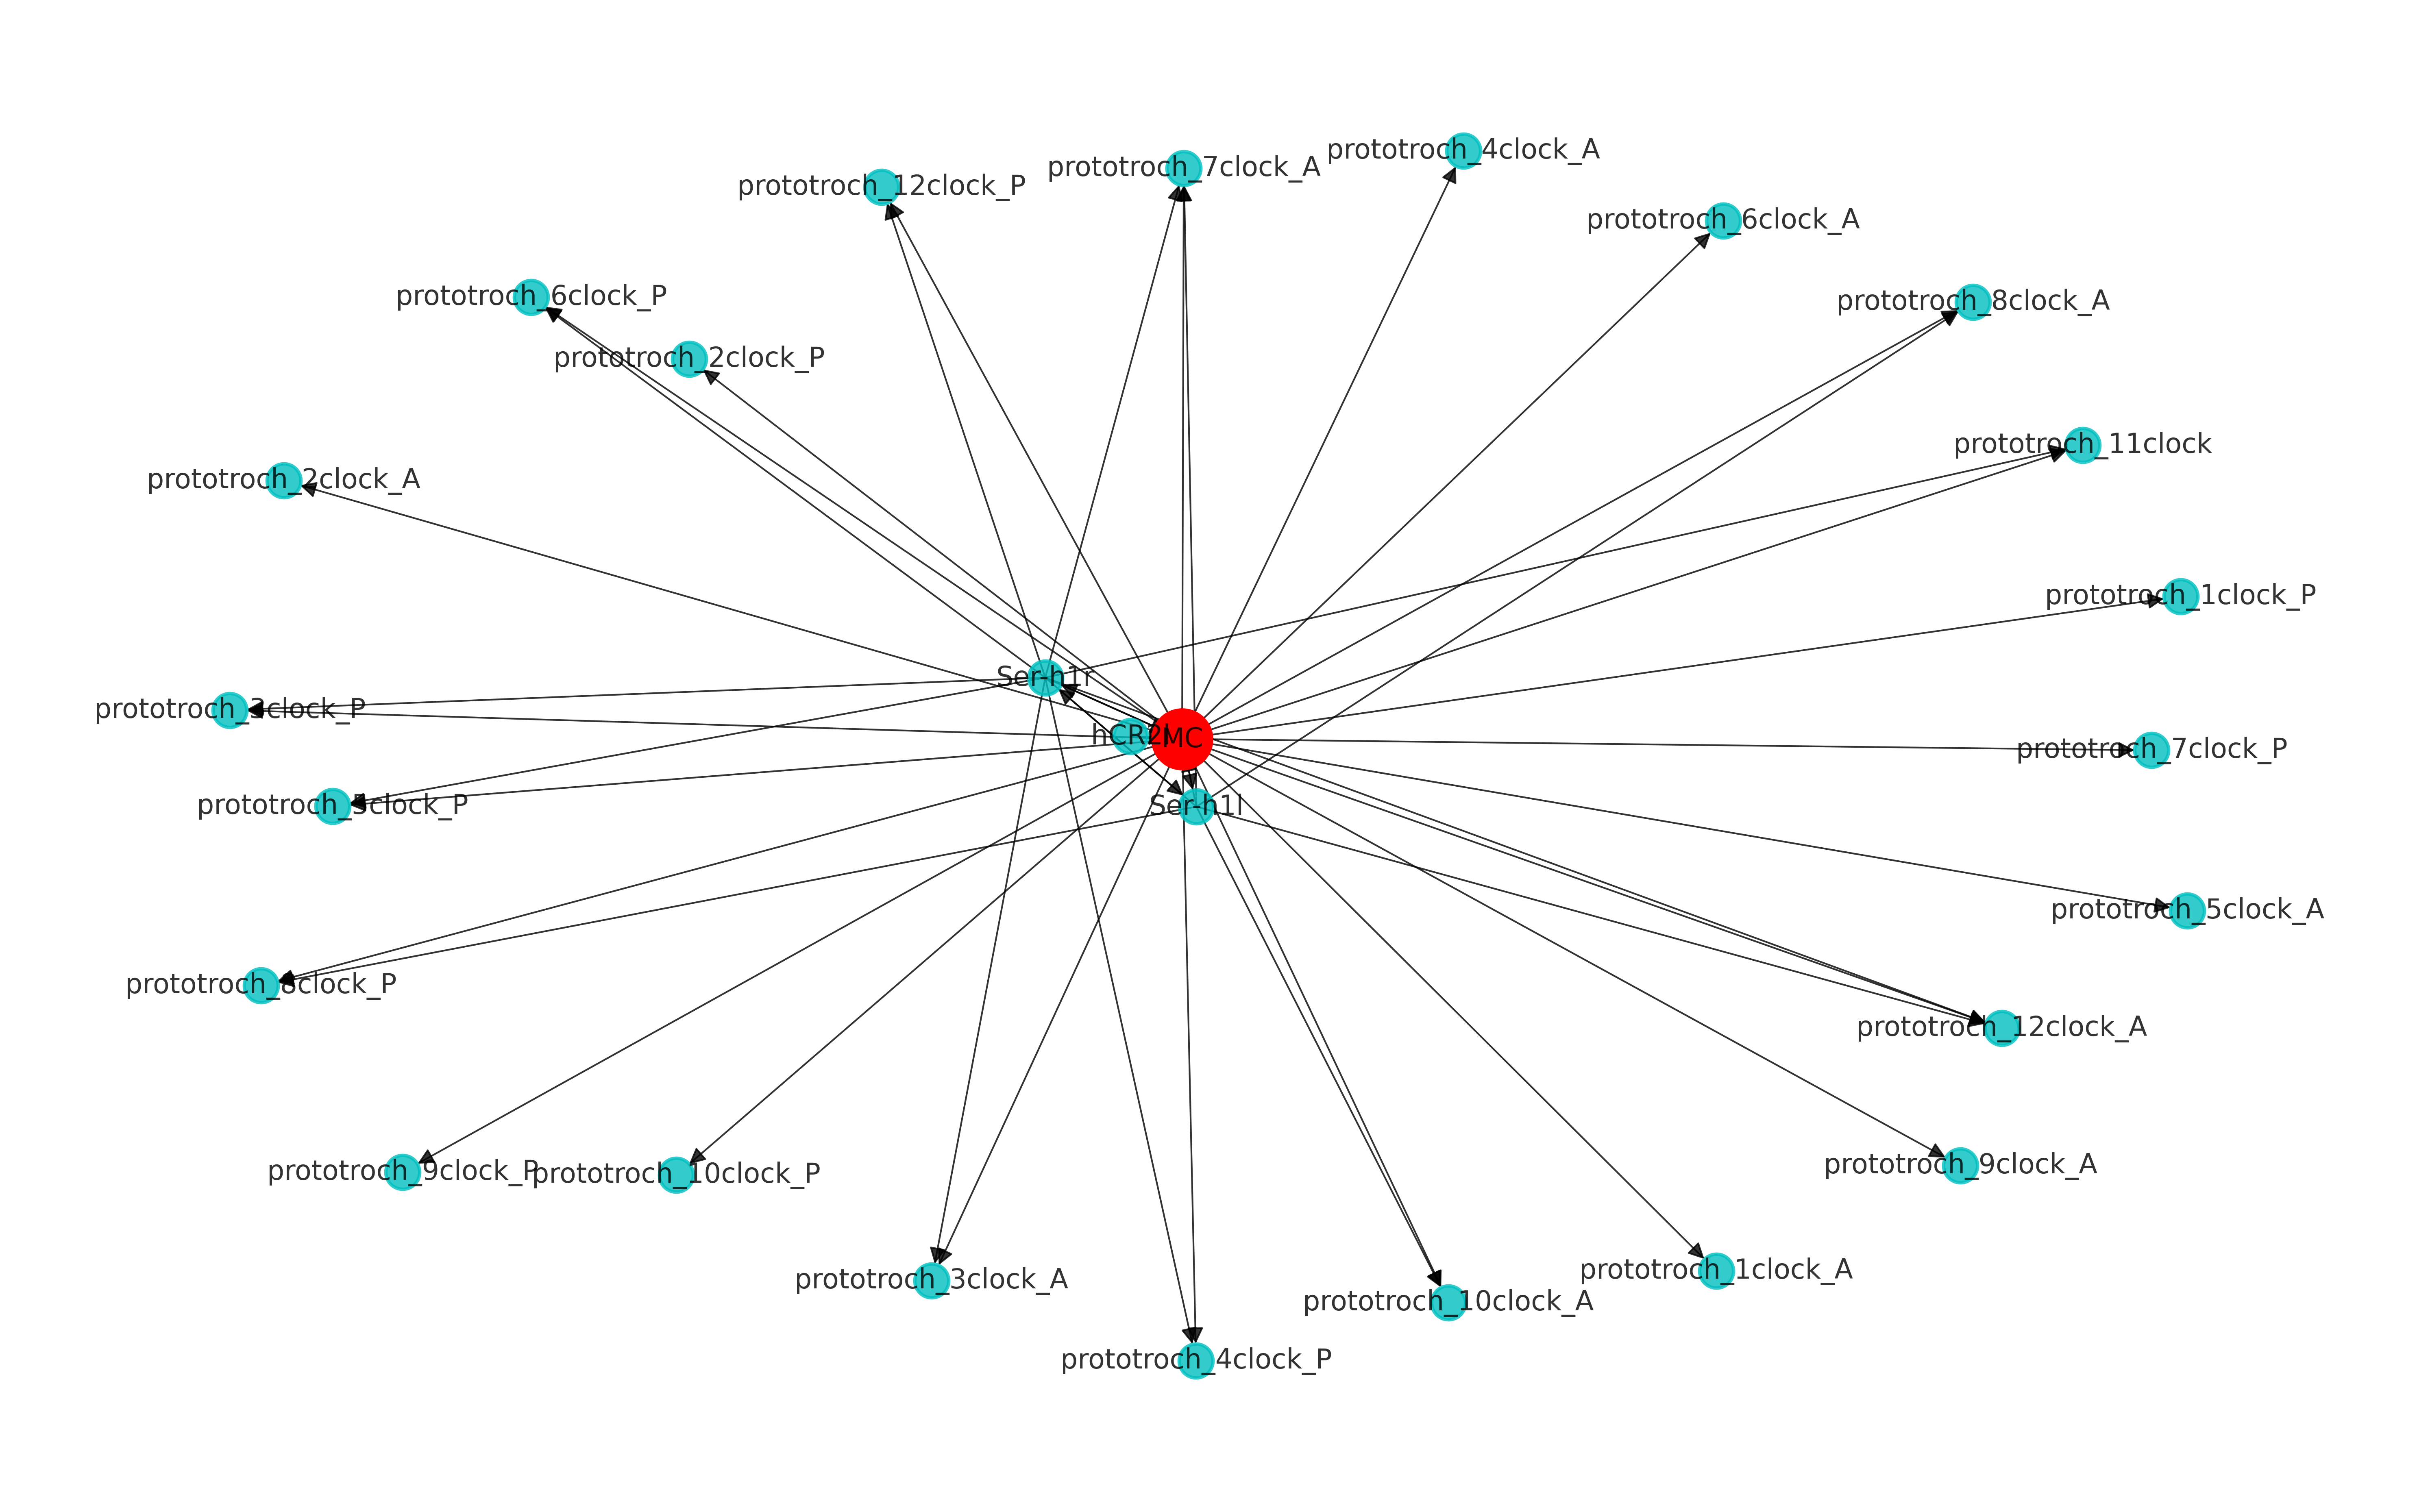

In [46]:
#Ego network of a node from the connectome graph

deg = 'MC'
node_ego= nx.ego_graph(G,deg)
pos= nx.spring_layout(node_ego)

h = 6
w = h*1.618
d = 600 #change to 600 for final version

plt.figure(figsize=(w, h), dpi=d)
nx.draw(node_ego, pos, node_color='c', node_size=100, with_labels=True, alpha=0.8, width=0.5, font_size=8, font_family='Verdana')
nx.draw_networkx_nodes(node_ego, pos, nodelist=[deg], node_size=300, node_color='r', alpha=1)
plt.show()

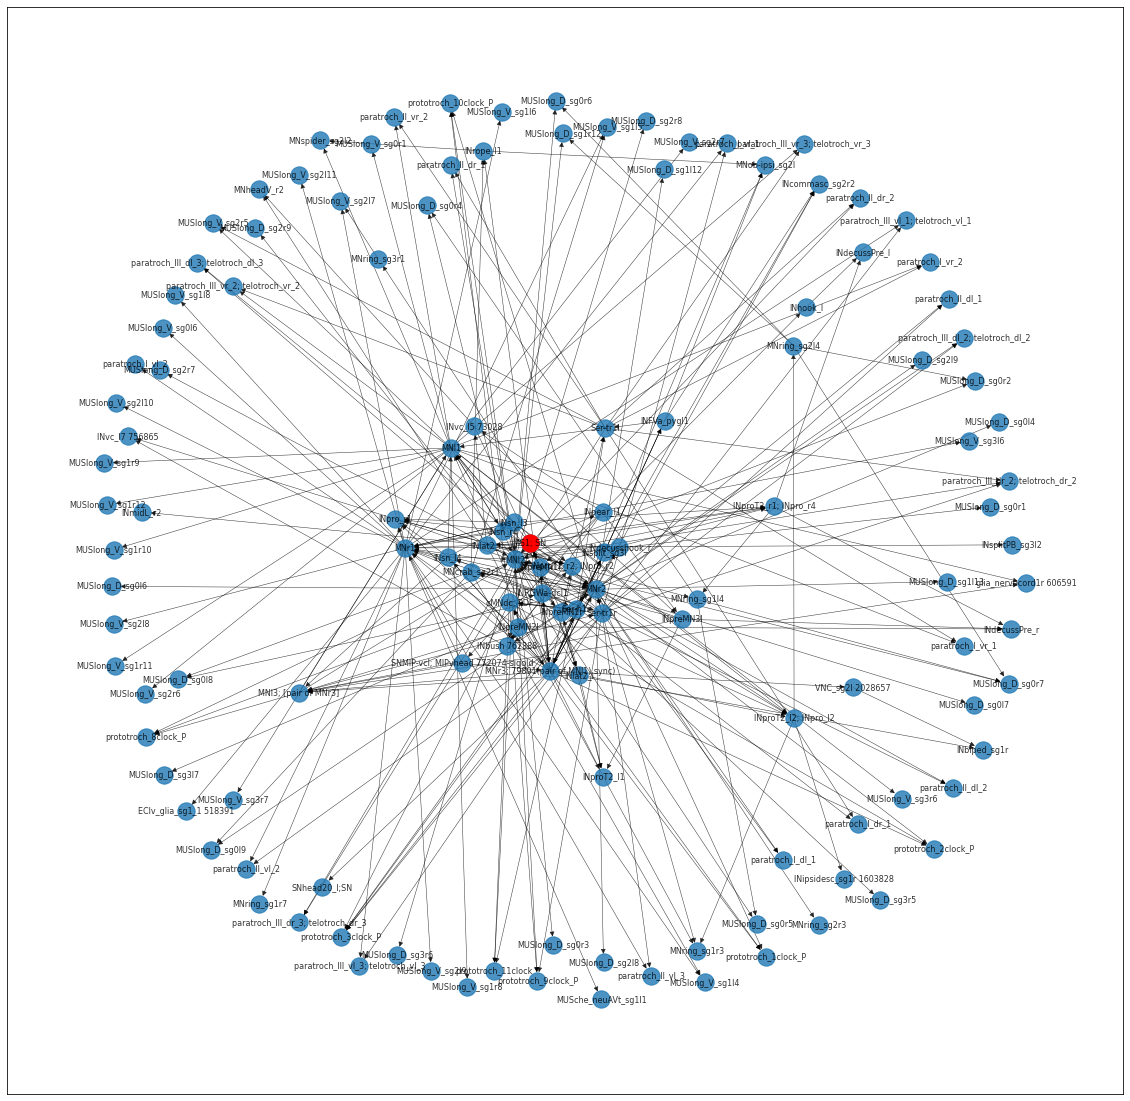

In [47]:
#Ego network with two jumps
deg = 'MS1; SN' 
ego_net = nx.ego_graph(G, deg, 2)
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(ego_net)
nx.draw_networkx(ego_net, pos, 
                 with_labels=True, alpha=0.8, width=0.5, font_size=8, font_family='Verdana')
nx.draw_networkx_nodes(ego_net, pos, nodelist=[deg], node_size=300, node_color='r',
                 with_labels=True, alpha=1, width=0.5, font_size=8, font_family='Verdana')
plt.show()

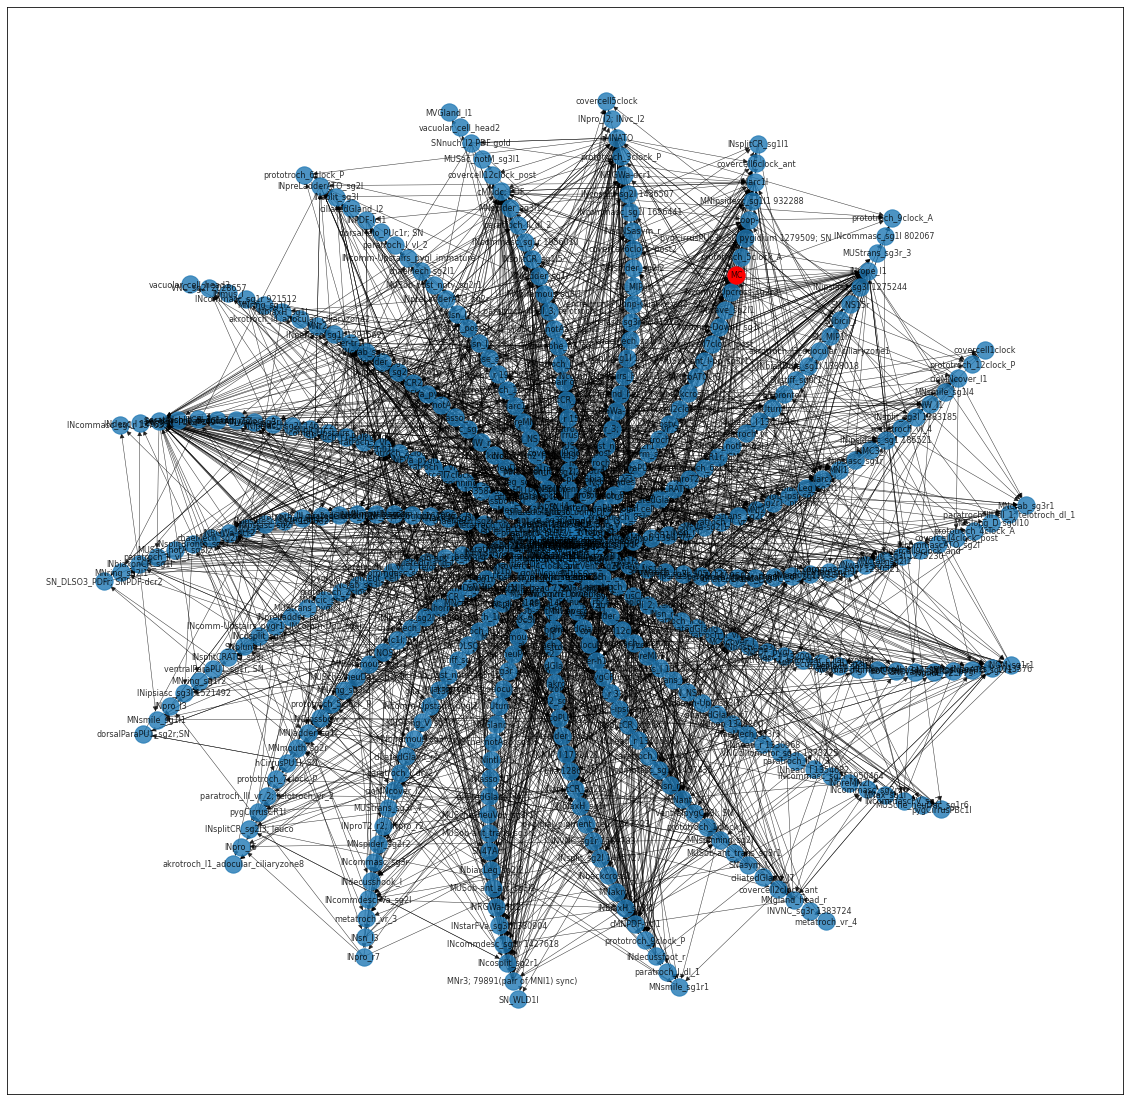

In [48]:
#Ego network of a node with 3 jumps and spiral layout
deg = 'MC' 
ego_net = nx.ego_graph(G, deg, 3)
plt.figure(figsize=(20, 20))
pos = nx.spiral_layout(ego_net)
nx.draw_networkx(ego_net, pos, 
                 with_labels=True, alpha=0.8, width=0.5, font_size=8, font_family='Verdana')
nx.draw_networkx_nodes(ego_net, pos, nodelist=[deg], node_size=300, node_color='r',
                 with_labels=True, alpha=1, width=0.5, font_size=8, font_family='Verdana')
plt.show()

### Centraliy measures aka Distance Between Two Nodes

In [49]:
#List the 20 highest degree centrality cells in the network
#In degree centrality metric, the importance of a node is determined by how many nodes it is connected to. 
#It is a measurement of the number of direct links to other actors in the network. 
list(sorted(nx.degree_centrality(G).items(), key=(lambda item: (-item[1],item[0]))))[:20]

[('pygPBunp', 0.07443563148261134),
 ('Ser-tr1r', 0.059182428309945086),
 ('Loop-l', 0.05491153142159853),
 ('Loop-r', 0.052471018913971934),
 ('INrope_l1', 0.04942037827943868),
 ('MNant_l', 0.045759609517998776),
 ('Ser-h1l', 0.043319097010372176),
 ('MNspinning_sg2r', 0.04270896888346552),
 ('cMNATO', 0.040268456375838924),
 ('Ser-tr1l', 0.03965832824893228),
 ('MNant_r', 0.039048200122025624),
 ('INrope_r1', 0.03843807199511897),
 ('MNspinning_sg2l', 0.03843807199511897),
 ('cMNPDF-vcl1', 0.037827943868212324),
 ('cMNdc; PDF', 0.03721781574130567),
 ('MNcrab_sg2l1', 0.035387431360585725),
 ('Ser-h1r', 0.03477730323367907),
 ('INarc1l', 0.03355704697986577),
 ('MNl3; [pair of MNr3]', 0.03050640634533252),
 ('MNspiderATO_sg2r1', 0.03050640634533252)]

In [50]:
#List the 20 highest betweenness centrality cells in the network
#Betweenness centrality can be described as how important an actor is, as a link between different networks. 
#It represents the number of times an actor needs to pass via a given actor to reach another actor. 
list(sorted(nx.betweenness_centrality(G).items(), key=(lambda item: (-item[1],item[0]))))[:20]

[('pygPBunp', 0.06755665481801068),
 ('Ser-tr1r', 0.043874520271571946),
 ('INrope_l1', 0.03205685132330605),
 ('Loop-l', 0.027774478380311097),
 ('Ser-h1l', 0.026552387114903236),
 ('INRGWa-dcr1', 0.022693830969881902),
 ('cMNPDF-vcl1', 0.022281777757768365),
 ('INrope_r1', 0.022153043316632832),
 ('MNspinning_sg2r', 0.021658800674653984),
 ('Loop-r', 0.021492200901302445),
 ('MNladder_sg1r', 0.019726417991854633),
 ('Ser-tr1l', 0.01818348921599568),
 ('MNr3; 79891(pair of MNl1) sync)', 0.017791530589433276),
 ('cMNATO', 0.016915881042795605),
 ('INarc1l', 0.01660622455101073),
 ('MNl3; [pair of MNr3]', 0.01658072753345733),
 ('MNspiderATO_sg2r1', 0.014685975093086603),
 ('INarc2l', 0.013909264955119365),
 ('MNant_l', 0.013467472675715682),
 ('INleucoPU_sg1r', 0.01342250989805412)]

In [51]:
#List the 20 highest closeness centrality cells in the network. 
#Closeness centrality can be defined as how close, to a particular actor, other actors are. 
#It is the sum of the geodesic distances of a node to all other nodes in the network. 
list(sorted(nx.closeness_centrality(G).items(), key=(lambda item: (-item[1],item[0]))))[:20]

[('MNant_l', 0.17382000931096003),
 ('Ser-tr1r', 0.1705861486726166),
 ('pygPBunp', 0.17046417073291503),
 ('Ser-tr1l', 0.17028153054998693),
 ('Loop-r', 0.16949459137574238),
 ('Loop-l', 0.16931402185368016),
 ('MNant_r', 0.16901392610420535),
 ('INarc1l', 0.16723545616975213),
 ('Ser-h1l', 0.1648645523997107),
 ('cMNdc; PDF', 0.16407029784582358),
 ('MNl2', 0.1626117534817813),
 ('MNspinning_sg2r', 0.16239383022478315),
 ('Ser-h1r', 0.16206263954451508),
 ('prototroch_9clock_P', 0.16164836452731843),
 ('MNcrab_sg2r1', 0.16156837869873378),
 ('prototroch_10clock_P', 0.16117684211171782),
 ('INrope_l1', 0.16107712349323086),
 ('INarc1r', 0.1598887610797999),
 ('INdescLuqinPDF_r', 0.15978159703081882),
 ('cMNPDF-vcl1', 0.1595676993105634)]

In [52]:
#List the 20 highest eigenvector centrality cells in the network
#Eigenvector centrality measurement describes the centrality of a person with regard to the global structure of the network. 
#It assigns relative scores to all nodes in the network based on the concept that connections to nodes with high scoring 
#contribute more to the score of the node in question than connections to nodes with low scoring.
list(sorted(nx.eigenvector_centrality(G).items(), key=(lambda item: (-item[1],item[0]))))[:20]

[('MNant_l', 0.172194752503376),
 ('Ser-h1l', 0.16720666287845373),
 ('Loop-r', 0.1671739285056352),
 ('Loop-l', 0.16304450879086396),
 ('cMNdc; PDF', 0.14749248039088764),
 ('pygPBunp', 0.13844223858577184),
 ('Ser-tr1r', 0.13710952680852523),
 ('Ser-h1r', 0.1322789625802534),
 ('MNant_r', 0.13036247639628498),
 ('MNspinning_sg2r', 0.12904660262845),
 ('Ser-tr1l', 0.12764260013091355),
 ('prototroch_9clock_P', 0.12204015499524819),
 ('prototroch_10clock_P', 0.12122486890529556),
 ('MC3cover_r', 0.1145457861796126),
 ('MNspinning_sg2l', 0.11144813097599961),
 ('INrope_l1', 0.10814673556898297),
 ('MC', 0.10729569338894882),
 ('cMNPDF-vcl1', 0.10656186447775054),
 ('INarc1l', 0.09971052971143578),
 ('INCrossbow__l', 0.09932538821031771)]

In [53]:
M = nx.to_numpy_matrix(G)
M

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [2., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


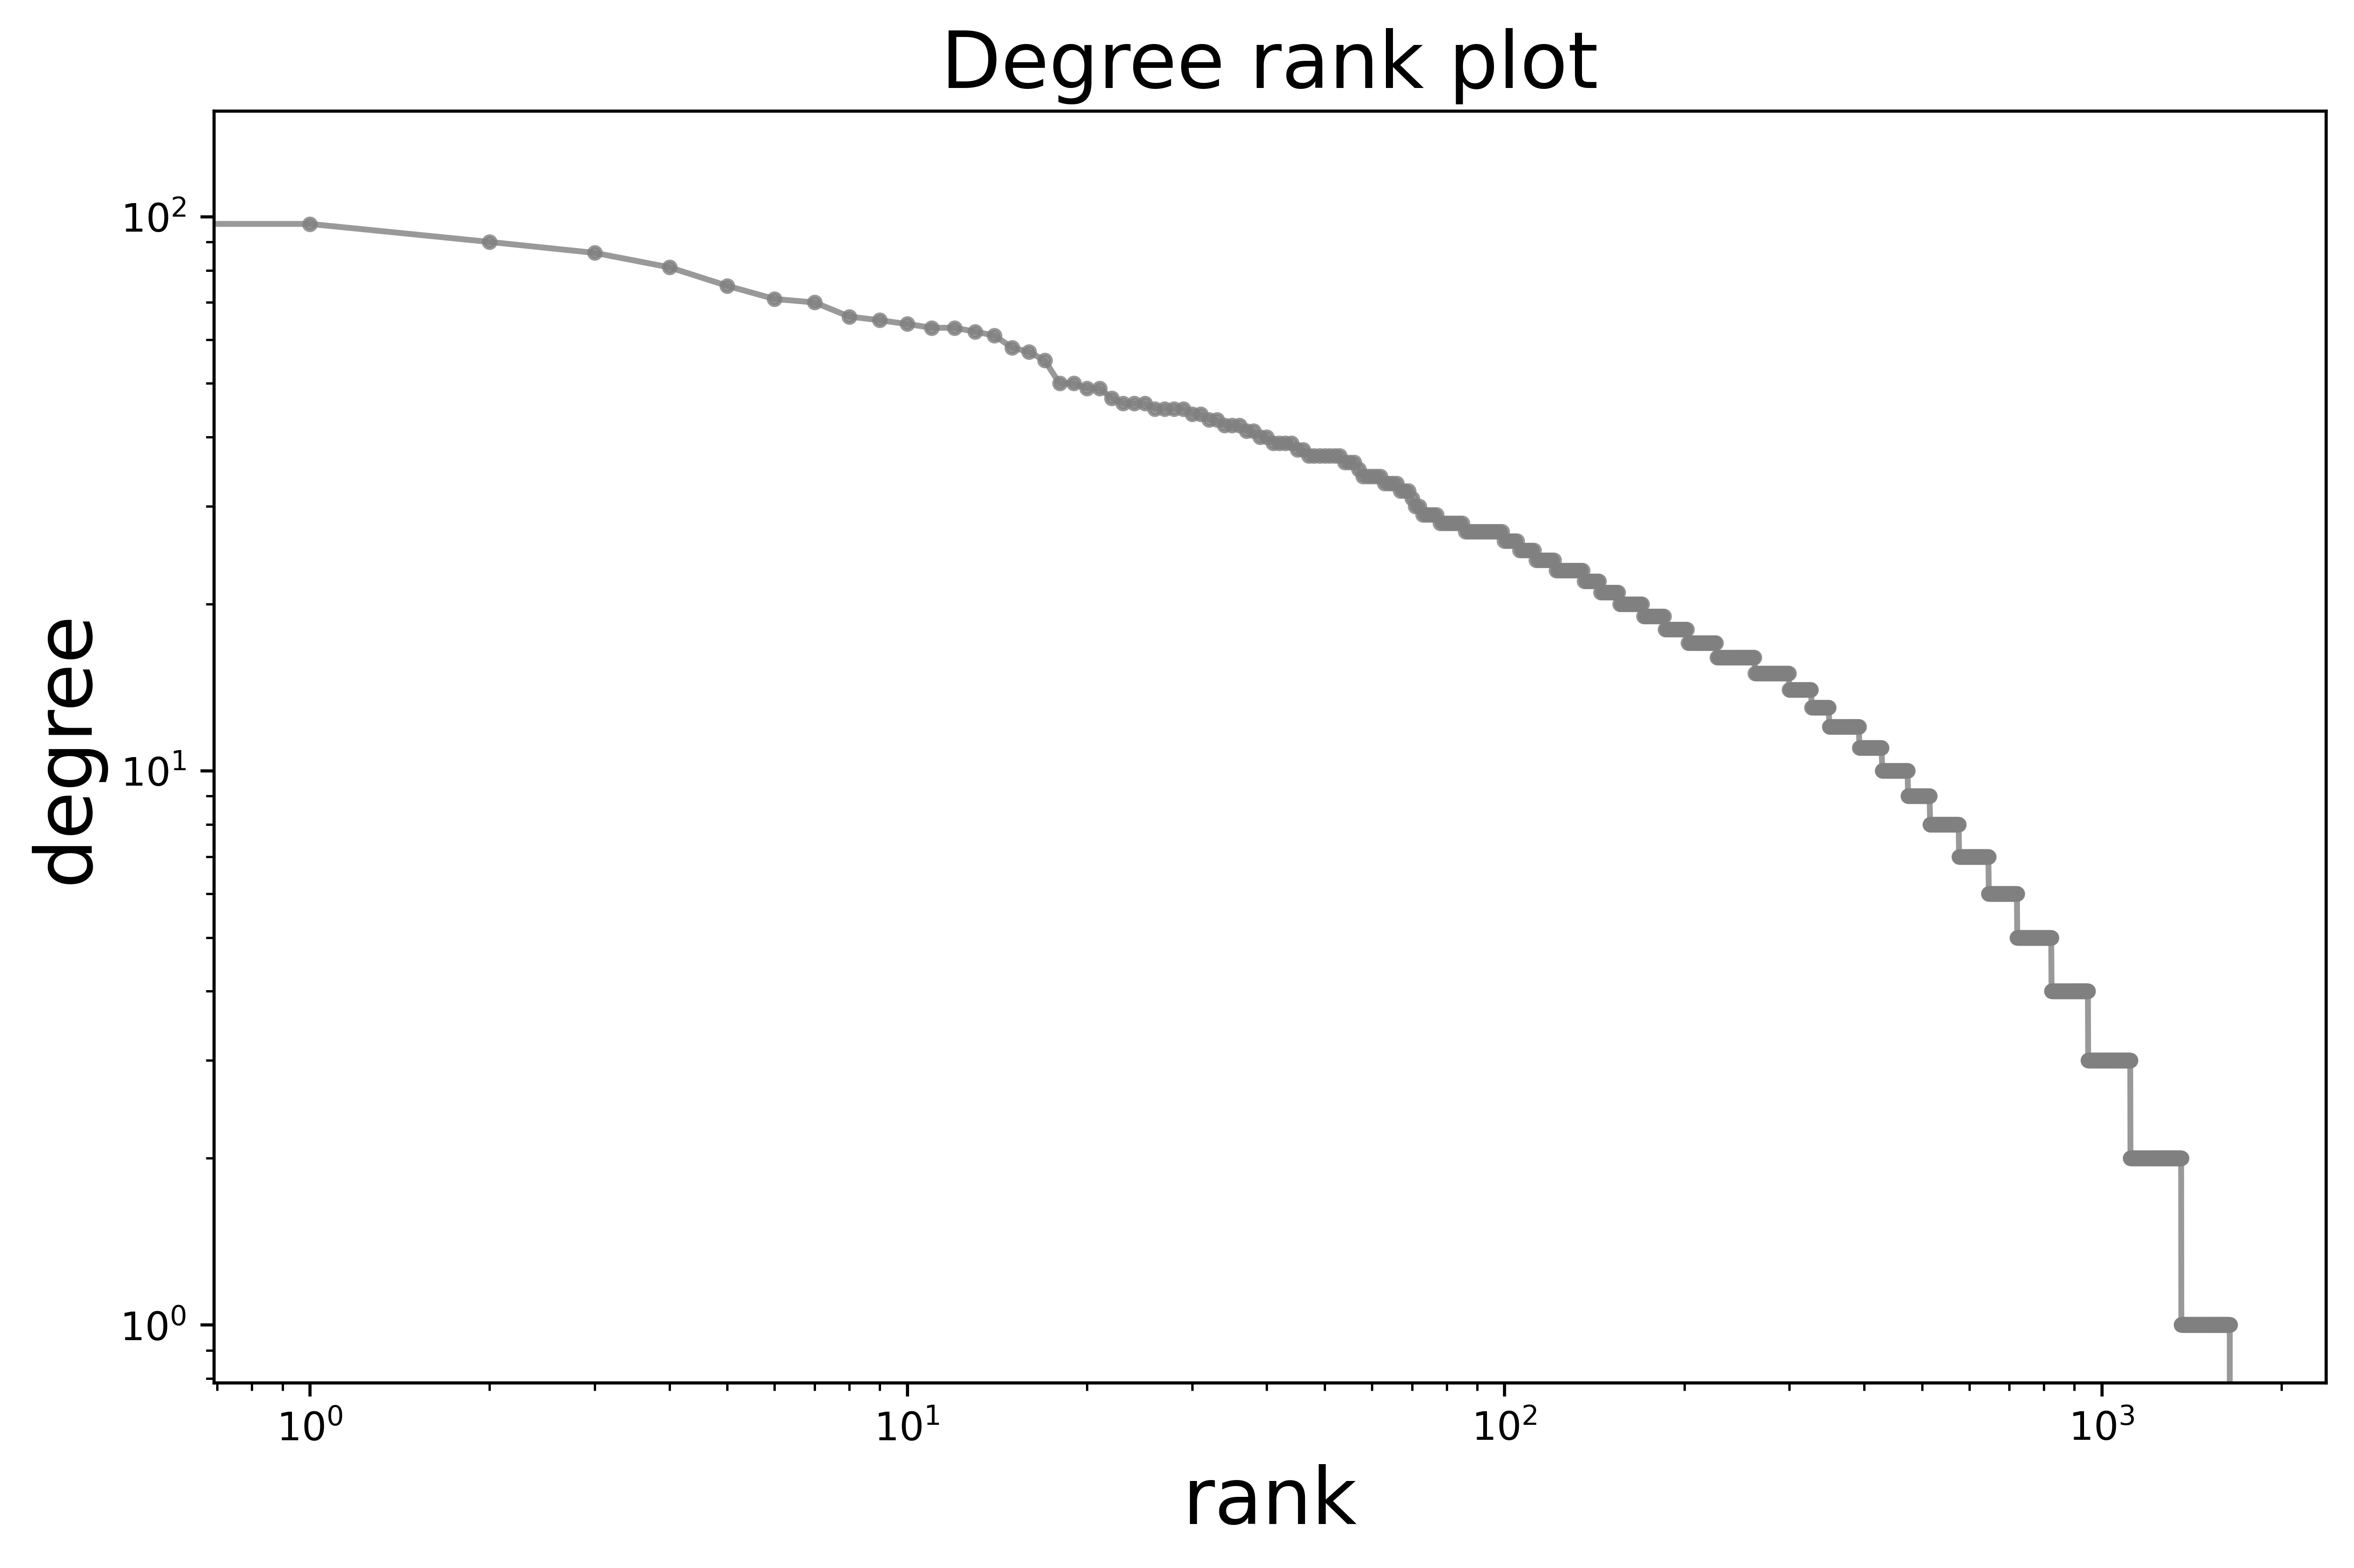

In [54]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# print "Degree sequence", degree_sequence

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']

h = 6
w = h*1.618
d = 600 #change to 600 for final version

plt.figure(figsize=(w, h), dpi=d)

plt.loglog(degree_sequence, color='grey', linestyle='solid', marker='.', alpha=0.8)
plt.title("Degree rank plot", fontsize=20)
plt.ylabel("degree", fontsize=20)
plt.xlabel("rank", fontsize=20)

plt.show()

Largest eigenvalue: (1.961328576844412+0j)
Smallest eigenvalue: 0j


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:854: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


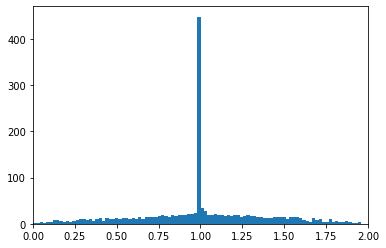

In [55]:
#Important note: non-directed graph of the connectome

L = nx.normalized_laplacian_matrix(Gnd)
e = np.linalg.eigvals(L.A)
print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.hist(e, bins=100)  # histogram with 100 bins
plt.xlim(0, 2)  # eigenvalues between 0 and 2
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


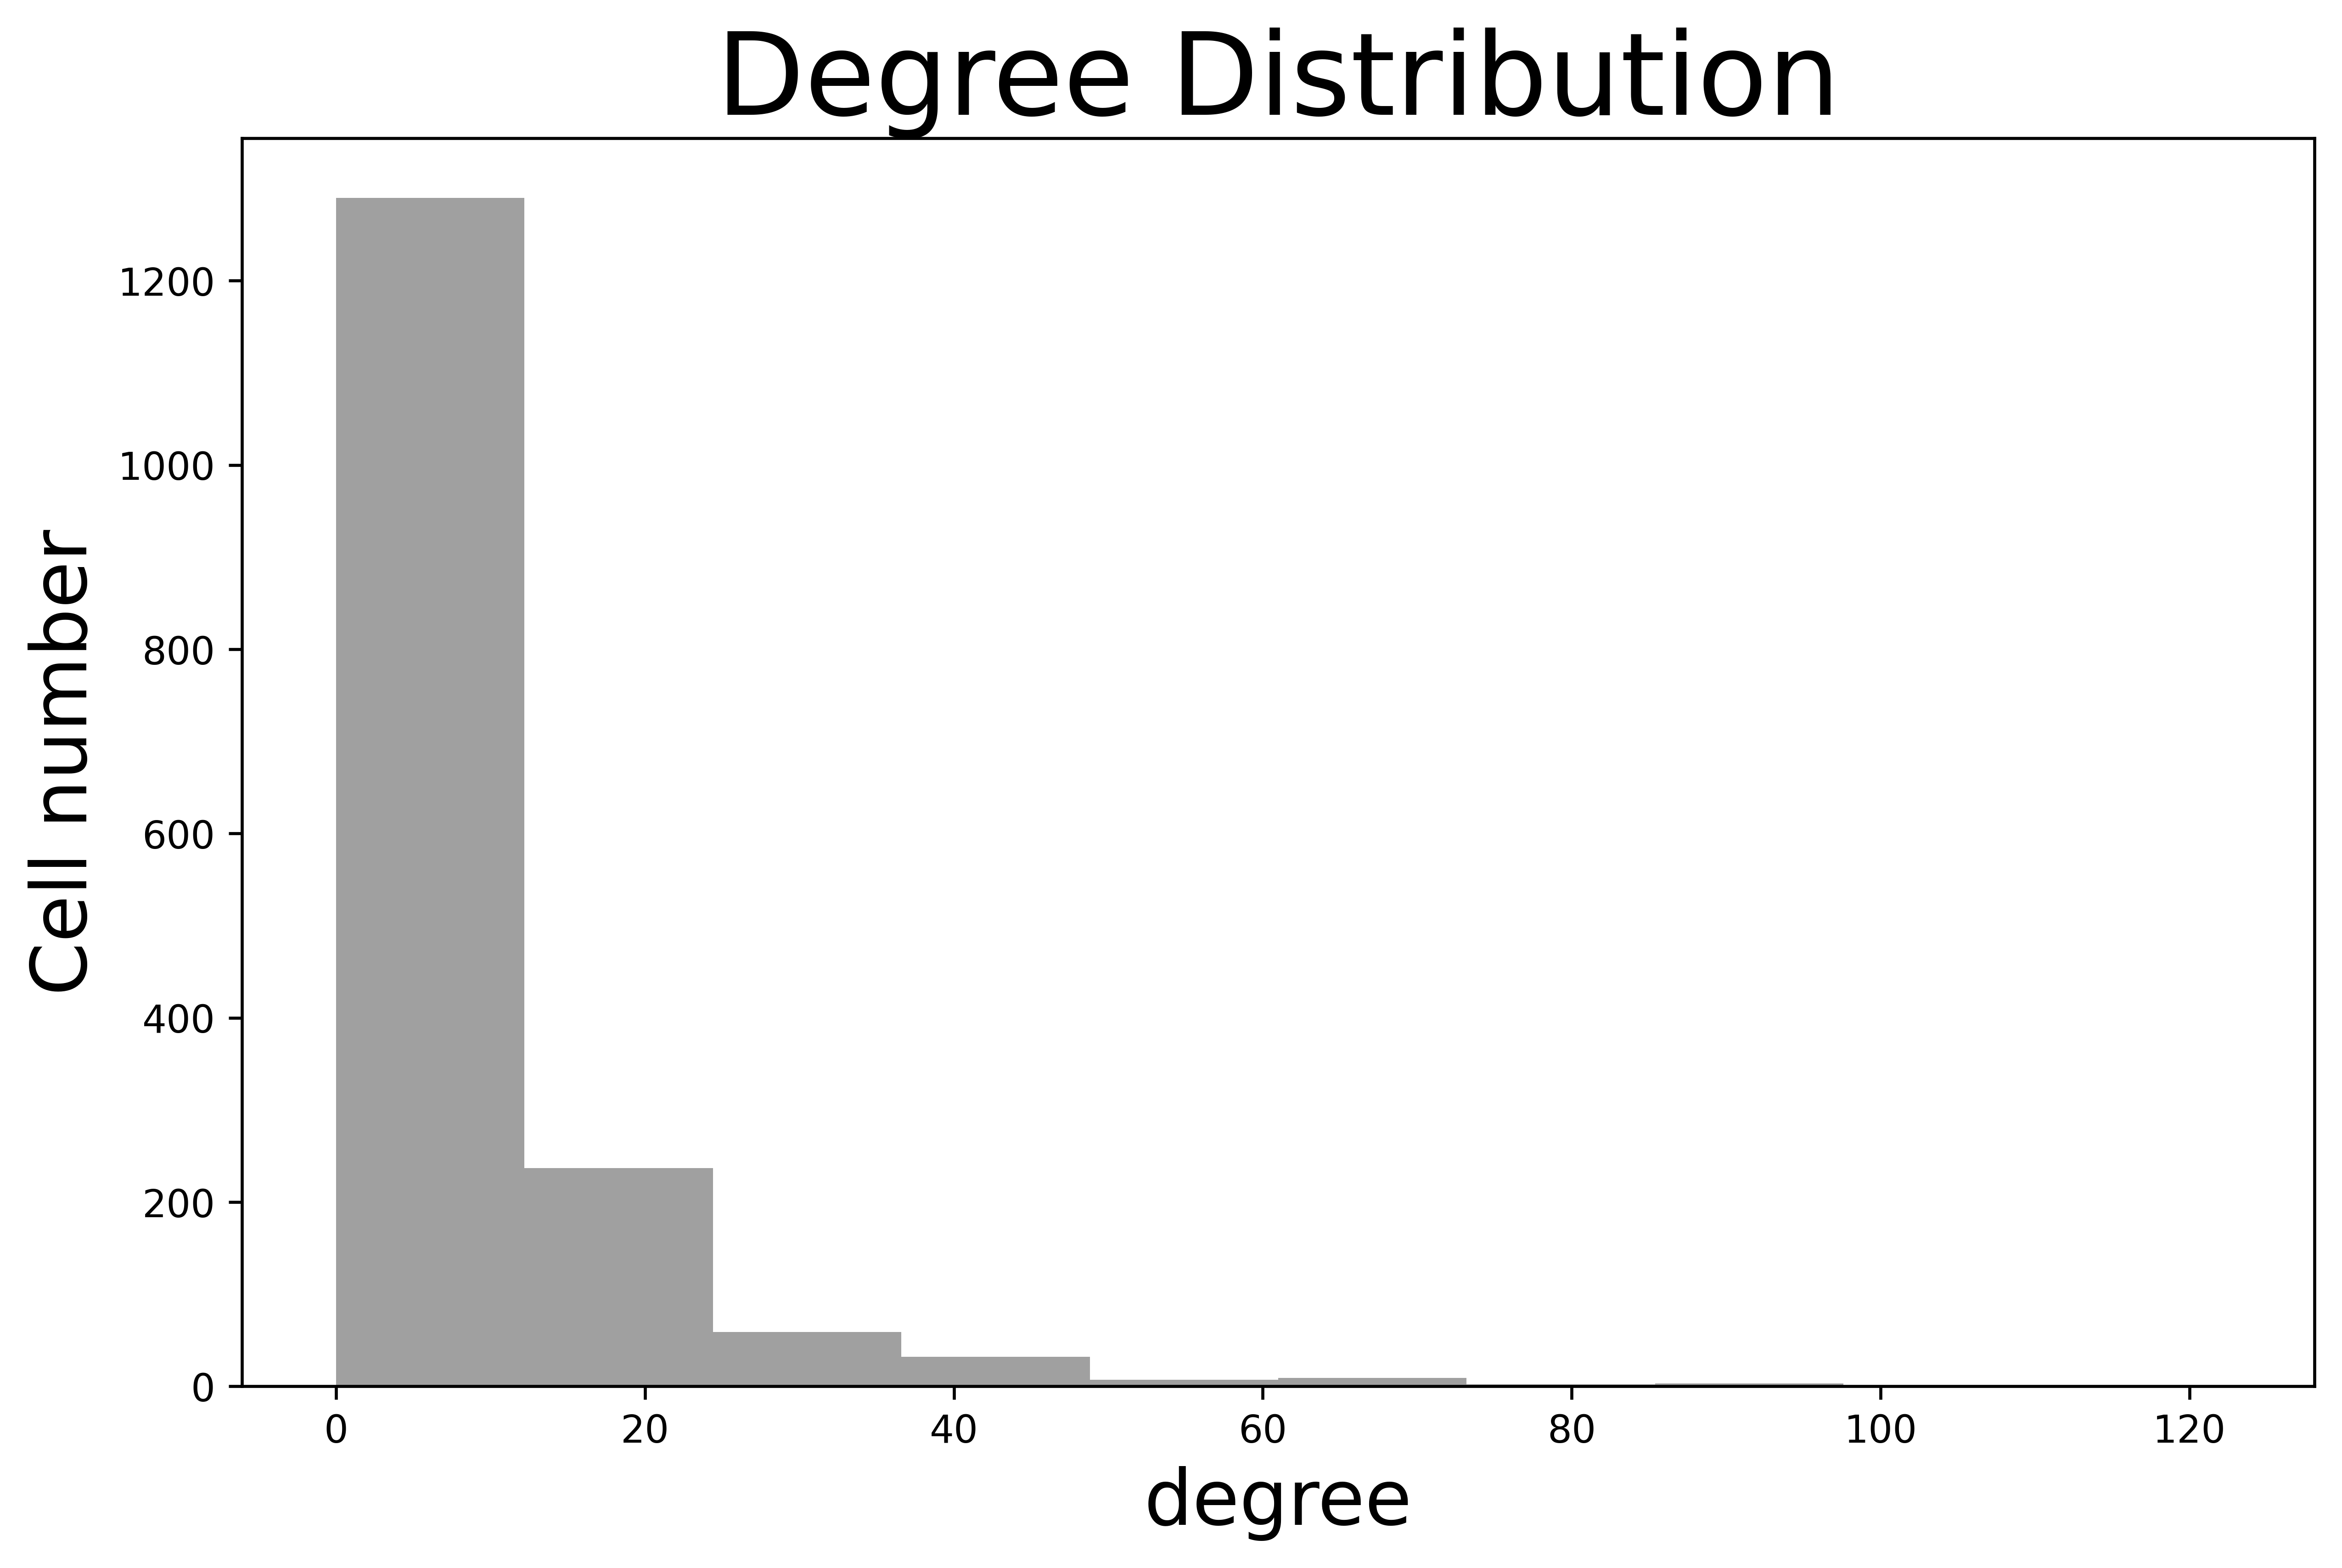

In [56]:
'''The degree of a node in a network (sometimes referred to incorrectly as the connectivity) 
is the number of connections or edges the node has to other nodes.'''

#printing the (in- plus out-)degree histogram

import matplotlib.pyplot as plt
import networkx as nx

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    h = 6
    w = h*1.618
    d = 600 #change to 600 for final version

    plt.figure(figsize=(w, h), dpi=d)

    plt.hist(degrees, facecolor='gray', alpha=0.75)
    plt.ylabel("Cell number", fontsize=20)
    plt.xlabel("degree", fontsize=20)
    plt.title('Degree Distribution', fontsize=30)
    plt.show()

plot_degree_dist(G)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.


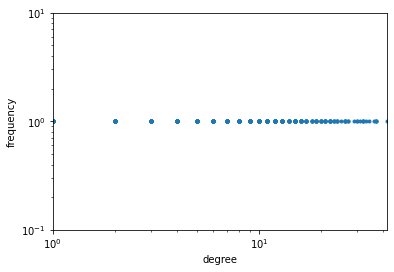

In [57]:
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt


degrees = G.in_degree()
degree_counts = Counter(degrees)                                                                                                 
x , y = zip(*degree_counts.items())                                                      

x = list(dict(x).values())
plt.figure(1)   

# prep axes                                                                                                                      
plt.xlabel('degree')                                                                                                             
plt.xscale('log')                                                                                                                
plt.xlim(1, max(x))  

plt.ylabel('frequency')                                                                                                          
plt.yscale('log')                                                                                                                
plt.ylim(1, max(y))                                                                                                             
                                                                                                                                     # do plot                                                                                                                        
plt.scatter(x, y, marker='.')                                                                                                    
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


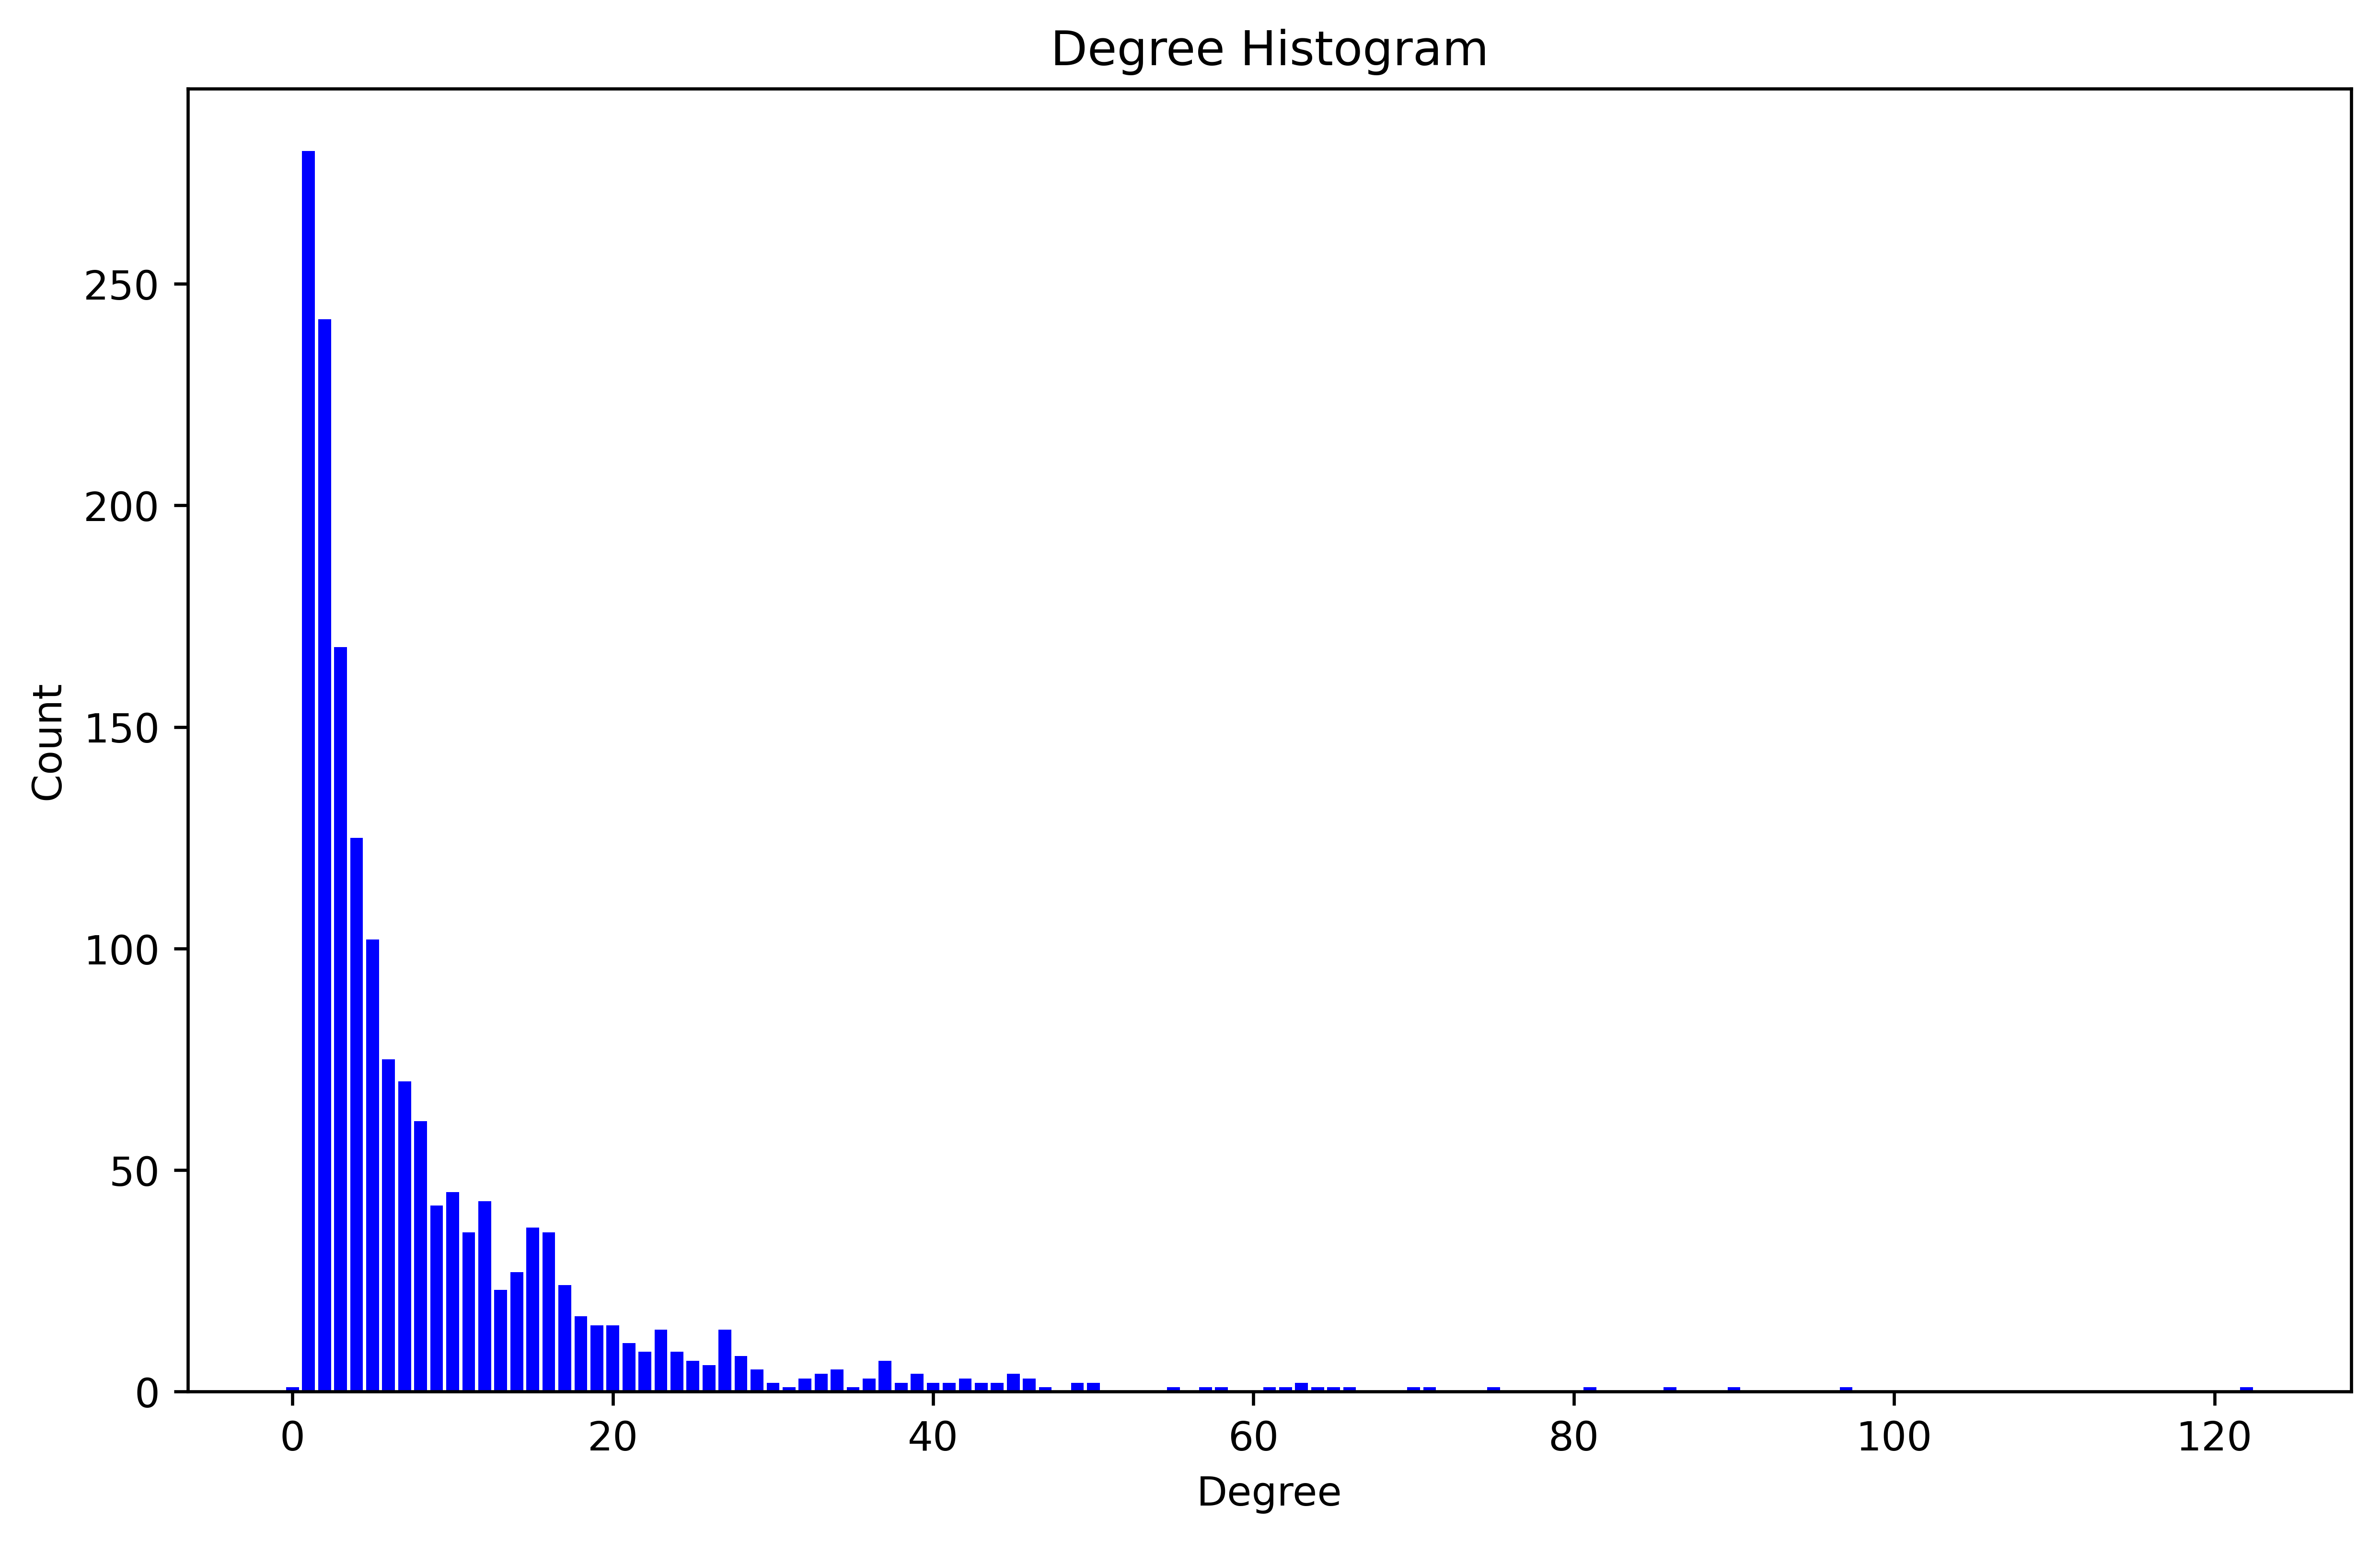

In [58]:
#Draw degree histogram 

import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

h = 6
w = h*1.618
d = 600 #change to 600 for final version

plt.figure(figsize=(w, h), dpi=d)

plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)



plt.show()

In [59]:
nx.diameter(G.to_undirected())

NetworkXError: ignored

In [60]:
#The eccentricity of a node v is the maximum distance from v to all other nodes in G.

import operator

ecc = nx.eccentricity(Gnd)
max(ecc.items(), key=operator.itemgetter(1))[0]

NetworkXError: ignored

In [61]:
import collections
collections.Counter(ecc).most_common(20)


NameError: ignored

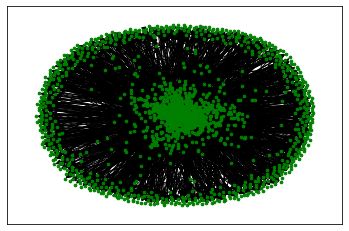

In [62]:
nx.draw_networkx(G, node_color='green', node_size=7, with_labels=False)

In [63]:
set(connectome.index) - set(list(G.nodes))

set()

In [64]:
list(set(list(connectome.index)) - set(list(G.nodes)))


[]

In [65]:
len(set(connectome.index)), len(set(list(G.nodes)))

(1640, 1640)

In [66]:
print([item for item, count in collections.Counter(list(connectome.index)).items() if count > 1])

[]
